In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [3]:
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


# Detecting outliers for maximum heart rate

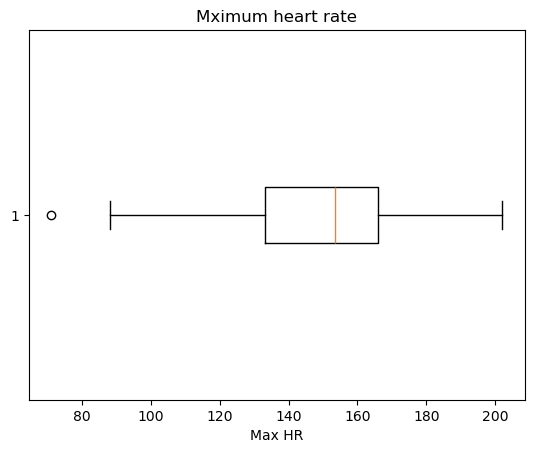

In [4]:

plt.boxplot(df['Max HR'],vert=False)
plt.xlabel('Max HR')
plt.title('Mximum heart rate')
plt.show()

# The boxplot of maximum heart rate shows a slightly left-skewed distribution with one outlier in the lower-end.
# This outlier was not removed as it can be significant indicator of a heart disease

# Detecting outliers for  Cholesterol

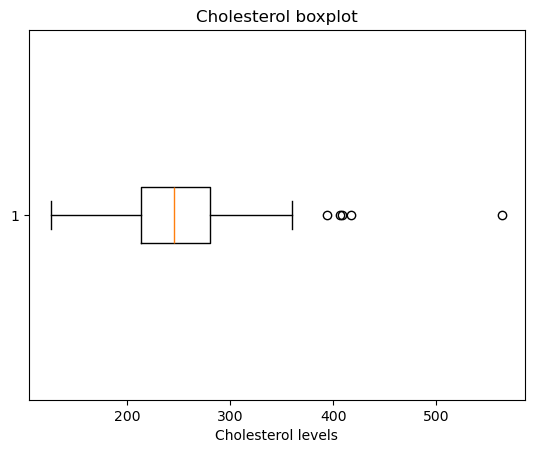

In [5]:
plt.boxplot(df['Cholesterol'],vert=False)
plt.xlabel('Cholesterol levels')
plt.title('Cholesterol boxplot')
plt.show()

# The boxplot of cholesterol levels was right skewed with upper-end outliers.
# Most people fell in the range of moderately high cholesterol level.
# The outliers detected on the upper-end can indicate serious factors for heart disease so they were retained rather than removed.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
#df1=df.drop(['Thallium','Slope of ST','Number of vessels fluro','ST depression','Exercise angina'],axis=1)

# The data set was inspected for null values , outliers , improper encoding . 
# No null values were found.
# Outliers were detected but they turned out to be significant in detecting heart disease as they were retained.
# Proper encoding was already done in the dataset . Binary variables such as sex , Exercise angina were retained .
# Therefore no additional data cleaning and encoding was required .

In [8]:
X=df.drop('Heart Disease',axis=1)
y=df['Heart Disease']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
pred=log_reg.predict(X_test_scaled)
pred

array(['Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Presence'], dtype=object)

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[24,  6],
       [ 2, 22]])

In [14]:
from sklearn.metrics import classification_report
report=classification_report(y_test,pred,output_dict=True)
df_report=pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score    support
Absence        0.923077  0.800000  0.857143  30.000000
Presence       0.785714  0.916667  0.846154  24.000000
accuracy       0.851852  0.851852  0.851852   0.851852
macro avg      0.854396  0.858333  0.851648  54.000000
weighted avg   0.862027  0.851852  0.852259  54.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [24]:
age = int(input("Enter Age: "))

sex_input = input("Sex (male/female): ").strip().lower()
sex = 1 if sex_input == "male" else 0

cp_input = input("Chest Pain Type (typical / atypical / non-anginal / asymptomatic): ").strip().lower()
cp_map = {
    "typical": 0,
    "atypical": 1,
    "non-anginal": 2,
    "asymptomatic": 3
}
cp = cp_map[cp_input]

bp = int(input("Resting Blood Pressure: "))
chol = int(input("Cholesterol level: "))

fbs_input = input("Fasting Blood Sugar > 120? (yes/no): ").strip().lower()
fbs = 1 if fbs_input == "yes" else 0

# -------- ECG --------
ekg_input = input("EKG Result (normal / stt abnormality / lv hypertrophy): ").strip().lower()
ekg_map = {
    "normal": 0,
    "stt abnormality": 1,
    "lv hypertrophy": 2
}
ekg = ekg_map[ekg_input]

thalach = int(input("Maximum Heart Rate Achieved: "))

exang_input = input("Exercise Induced Angina? (yes/no): ").strip().lower()
exang = 1 if exang_input == "yes" else 0

# -------- ST FEATURES --------
st_depression = float(input("ST depression (0–6): "))

slope_input = input("Slope of ST (upsloping / flat / downsloping): ").strip().lower()
slope_map = {
    "upsloping": 0,
    "flat": 1,
    "downsloping": 2
}
slope_of_st = slope_map[slope_input]

number_of_vessels = int(input("Number of vessels (0–3): "))

# -------- THALLIUM --------
thal_input = input("Thallium test (normal / fixed defect / reversible defect): ").strip().lower()
thal_map = {
    "normal": 1,
    "fixed defect": 2,
    "reversible defect": 3
}
thal = thal_map[thal_input]

# -------- FINAL ARRAY --------
user_input = np.array([[age, sex, cp, bp, chol, fbs,
                        ekg, thalach, exang,
                        st_depression, slope_of_st,
                        number_of_vessels, thal]])

user_input_scaled = scaler.transform(user_input)

prediction = log_reg.predict(user_input_scaled)
probability = log_reg.predict_proba(user_input_scaled)

# -------- OUTPUT --------
if prediction[0] == 'Presence':
    print("\n Heart Disease Detected")
    print("Confidence:", round(probability[0][1] * 100, 2), "%")
else:
    print("\n No Heart Disease Detected")
    print("Confidence:", round(probability[0][0] * 100, 2), "%")

Enter Age:  70
Sex (male/female):  male
Chest Pain Type (typical / atypical / non-anginal / asymptomatic):  atypical
Resting Blood Pressure:  200
Cholesterol level:  300
Fasting Blood Sugar > 120? (yes/no):  yes
EKG Result (normal / stt abnormality / lv hypertrophy):  normal
Maximum Heart Rate Achieved:  200
Exercise Induced Angina? (yes/no):  yes
ST depression (0–6):  6
Slope of ST (upsloping / flat / downsloping):  downsloping
Number of vessels (0–3):  3
Thallium test (normal / fixed defect / reversible defect):  fixed defect



 No Heart Disease Detected
Confidence: 3.91 %


D:\THIS PC\conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model=RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf_model.fit(X_train,y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
rf_pred=rf_model.predict(X_test)
rf_pred

array(['Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence'], dtype=object)

In [26]:
report2=classification_report(y_test,rf_pred,output_dict=True)
df_report2=pd.DataFrame(report2).transpose()
print(df_report2)

              precision    recall  f1-score    support
Absence        0.862069  0.833333  0.847458  30.000000
Presence       0.800000  0.833333  0.816327  24.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.831034  0.833333  0.831892  54.000000
weighted avg   0.834483  0.833333  0.833622  54.000000


In [34]:
age = int(input("Enter Age: "))

sex_input = input("Sex (male/female): ").strip().lower()
sex = 1 if sex_input == "male" else 0

cp_input = input("Chest Pain Type (typical / atypical / non-anginal / asymptomatic): ").strip().lower()
cp_map = {
    "typical": 0,
    "atypical": 1,
    "non-anginal": 2,
    "asymptomatic": 3
}
cp = cp_map[cp_input]

bp = int(input("Resting Blood Pressure: "))
chol = int(input("Cholesterol level: "))

fbs_input = input("Fasting Blood Sugar > 120? (yes/no): ").strip().lower()
fbs = 1 if fbs_input == "yes" else 0

# -------- ECG --------
ekg_input = input("EKG Result (normal / stt abnormality / lv hypertrophy): ").strip().lower()
ekg_map = {
    "normal": 0,
    "stt abnormality": 1,
    "lv hypertrophy": 2
}
ekg = ekg_map[ekg_input]

thalach = int(input("Maximum Heart Rate Achieved: "))

exang_input = input("Exercise Induced Angina? (yes/no): ").strip().lower()
exang = 1 if exang_input == "yes" else 0

# -------- ST FEATURES --------
st_depression = float(input("ST depression (0–6): "))

slope_input = input("Slope of ST (upsloping / flat / downsloping): ").strip().lower()
slope_map = {
    "upsloping": 0,
    "flat": 1,
    "downsloping": 2
}
slope_of_st = slope_map[slope_input]

number_of_vessels = int(input("Number of vessels (0–3): "))

# -------- THALLIUM --------
thal_input = input("Thallium test (normal / fixed defect / reversible defect): ").strip().lower()
thal_map = {
    "normal": 1,
    "fixed defect": 2,
    "reversible defect": 3
}
thal = thal_map[thal_input]

# -------- FINAL ARRAY --------
user_input = np.array([[age, sex, cp, bp, chol, fbs,
                        ekg, thalach, exang,
                        st_depression, slope_of_st,
                        number_of_vessels, thal]])



prediction = rf_model.predict(user_input)
probability = rf_model.predict_proba(user_input)

# -------- OUTPUT --------
if prediction[0] == 'Presence':
    print("\n Heart Disease Detected")
    print("Confidence:", round(probability[0][1] * 100, 2), "%")
else:
    print("\n No Heart Disease Detected")
    print("Confidence:", round(probability[0][0] * 100, 2), "%")

Enter Age:  56
Sex (male/female):  male
Chest Pain Type (typical / atypical / non-anginal / asymptomatic):  atypical
Resting Blood Pressure:  250
Cholesterol level:  300
Fasting Blood Sugar > 120? (yes/no):  yes
EKG Result (normal / stt abnormality / lv hypertrophy):  normal
Maximum Heart Rate Achieved:  350
Exercise Induced Angina? (yes/no):  yes
ST depression (0–6):  6
Slope of ST (upsloping / flat / downsloping):  downsloping
Number of vessels (0–3):  3
Thallium test (normal / fixed defect / reversible defect):  fixed defect



 Heart Disease Detected
Confidence: 66.0 %


D:\THIS PC\conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\THIS PC\conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


D:\THIS PC\conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Presence'], dtype=object)

In [35]:
import joblib

In [39]:
joblib.dump(rf_model,"heart_random_forest_model.pkl")
joblib.dump(log_reg,"heart_log_regression_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [40]:
import os
os.listdir()

['-1.14-windows.xml',
 '.anaconda',
 '.android',
 '.conda',
 '.continuum',
 '.dbus-keyrings',
 '.idlerc',
 '.insomniac',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 '.MUMUVMM',
 '.pymobiledevice3',
 '.vscode',
 'anaconda_projects',
 'ansel',
 'AppData',
 'Apple',
 'Application Data',
 'canada_per_capita_income.csv',
 'columns.json',
 'Contacts',
 'Cookies',
 'CTUTORIALS',
 'data.csv',
 'Desktop',
 'Documents',
 'e-commerce_project.ipynb',
 'e_commerce_project.ipynb',
 'Favorites',
 'first',
 'Heart_Disease_Prediction.csv',
 'heart_disease_prediction.ipynb',
 'heart_log_regression_model.pkl',
 'heart_random_forest_model.pkl',
 'hello world.c',
 'house_price_model.pkl',
 'housing_price_model',
 'housing_price_model.ipynb',
 'housing_train.csv',
 'Links',
 'Local Settings',
 'mumu_boot.txt',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{aa23e6ba-fde1-11ef-af5d-94281fa88003}.TxR.0.regtrans-ms',
 '